In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
X = df.drop(['DEATH_EVENT'], axis = 1)

In [6]:
y = df['DEATH_EVENT']

Verhältnis positiver vs negativer Ausprägungen in der Zielvariable:

In [7]:
df[df["DEATH_EVENT"] == 1].DEATH_EVENT.sum() / df.DEATH_EVENT.count()

0.3210702341137124

Experiment: SMOTE UPSAMLING

In [8]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Neues Verhältnis nach SMOTE Anwendung: 

In [10]:
y[y == 1].sum() / len(y)

0.5

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
model = RandomForestClassifier()

In [13]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_preds = model.predict(X_test)

In [15]:
y_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [16]:
confusion_matrix(y_test, y_preds)

array([[56,  6],
       [ 9, 63]], dtype=int64)

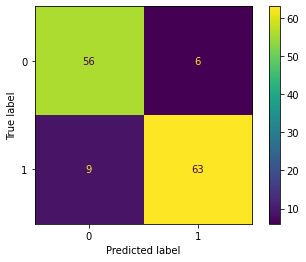

In [17]:
plot_confusion_matrix(model, X_test, y_test) 

In [52]:
grid = {"n_estimators" : np.arange(20,200,2)}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,
        46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198])})

In [53]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)

{'n_estimators': 82}
RandomForestClassifier(n_estimators=82)


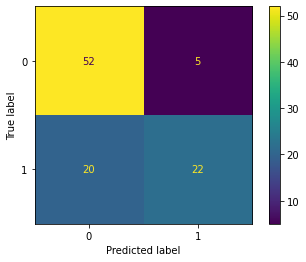

In [56]:
plot_confusion_matrix(rf_random, X_test, y_test);